In [1]:
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from neurasort.bio482.helpers import *

import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
raw_data = pd.read_csv('raw_predictors_free_whisking.csv')
#raw_data = pd.read_csv('raw_predictors.csv')

In [3]:
raw_data

,cell_type,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high
0,EXC,3.25,-0.028422,0.563846,-0.038375,0.005196,0.000043,0.000518
1,EXC,0.20,-0.033953,1.012500,-0.049049,0.004335,0.000053,0.000485
2,EXC,0.05,-0.039291,3.350000,-0.050940,0.005286,0.000063,0.000519
3,EXC,0.00,0.000000,0.000000,-0.047544,0.004778,0.000057,0.000557
4,EXC,0.15,-0.033361,1.733333,-0.046490,0.002881,0.000031,0.000403
...,...,...,...,...,...,...,...,...
492,SST,6.60,-0.047992,0.564015,-0.056633,0.003752,0.000066,0.000438
493,SST,6.80,-0.047427,0.578676,-0.056827,0.004175,0.000071,0.000514
494,SST,7.50,-0.047400,0.589667,-0.056011,0.004038,0.000067,0.000460
495,SST,5.50,-0.048279,0.580455,-0.056918,0.003525,0.000054,0.000430


In [4]:
def free_whisking_preprocessing_pipe()->Pipeline:
    """Create free whisking pre-processing pipeline"""
    scaler= StandardScaler()
    constant_remover = VarianceThreshold(threshold=0.)
    # cell_depth_imputer = IterativeImputer(max_iter=10, random_state=0)

    scaler.set_output(transform="pandas")
    constant_remover.set_output(transform="pandas")
    # cell_depth_imputer.set_output(transform="pandas")

    return Pipeline(
        [
            ("scaling", scaler),
            ("remove_constants", constant_remover),
            # ("impute cell depth", cell_depth_imputer),
        ]
    )

In [5]:
preprocessing_pipe=free_whisking_preprocessing_pipe()


## PCA

In [6]:
pca = PCA()
pca.set_output(transform="pandas")
pca_data = pca.fit_transform(preprocessing_pipe.fit_transform(raw_data.drop('cell_type', axis=1)))
pca_data['cell_type'] = raw_data['cell_type']
pca_data

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,cell_type
0,-0.633070,-1.566721,-1.416348,1.878278,-1.109381,-1.014479,0.279458,EXC
1,-0.989507,-0.169828,-0.782045,0.651289,-0.586602,0.015980,0.053527,EXC
2,-0.417878,2.758763,-2.568904,1.503917,-0.360573,2.166833,0.161659,EXC
3,-1.382382,-2.314005,1.455236,2.458732,-1.092710,0.240114,0.018446,EXC
4,-1.999743,0.281313,-1.982932,1.214432,-0.137824,0.291762,-0.346604,EXC
...,...,...,...,...,...,...,...,...
492,-0.697944,0.031012,-0.195480,-1.376564,-0.013467,-0.053578,0.059766,SST
493,-0.314488,0.131059,-0.019668,-1.257436,-0.124989,-0.005413,-0.000832,SST
494,-0.522412,0.019880,-0.219525,-1.216644,-0.050933,-0.055270,0.107425,SST
495,-1.031856,0.170265,-0.238293,-1.292805,0.198116,-0.304880,0.020634,SST


<Axes: xlabel='pca0', ylabel='pca1'>

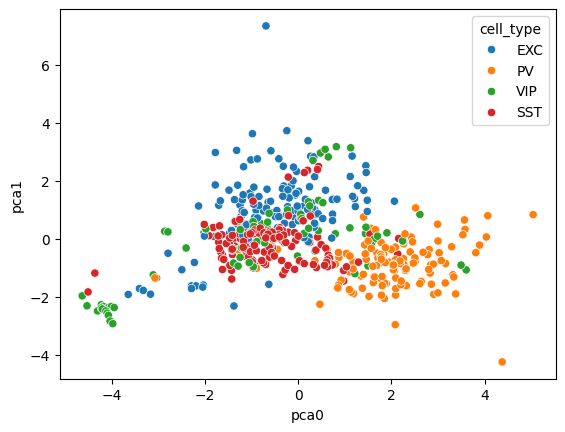

In [7]:
sns.scatterplot(
    data=pca_data,
    x='pca0',
    y='pca1',
    hue='cell_type'
)

In [8]:
import plotly.express as px
fig = px.scatter_3d(pca_data, x='pca0', y='pca1', z='pca2',
              color='cell_type'
              
              )
fig.show()

## TSNE

In [39]:
from sklearn.manifold import TSNE
tsne2D = TSNE(n_components=2)
tsne2D.set_output(transform="pandas")
tsne2D_data = tsne2D.fit_transform(preprocessing_pipe.fit_transform(raw_data.drop('cell_type', axis=1)))
tsne2D_data['cell_type'] = raw_data['cell_type']
tsne2D_data

,tsne0,tsne1,cell_type
0,-7.725577,-14.643687,EXC
1,4.546610,-1.859809,EXC
2,-25.890886,8.651002,EXC
3,-40.710152,15.207497,EXC
4,-17.059235,0.512259,EXC
...,...,...,...
492,-12.010291,13.394444,SST
493,-11.720140,14.748635,SST
494,-11.172937,13.082697,SST
495,-11.292717,11.043468,SST


<Axes: xlabel='tsne0', ylabel='tsne1'>

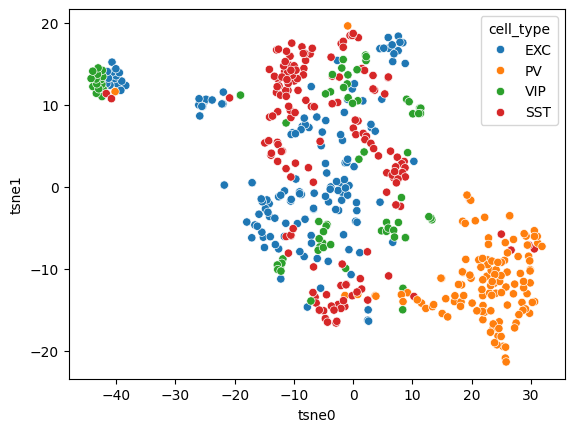

In [40]:
sns.scatterplot(
    data=tsne2D_data,
    x='tsne0',
    y='tsne1',
    hue='cell_type'
)

In [27]:
tsne3D = TSNE(n_components=3)
tsne3D.set_output(transform="pandas")
tsne3D_data = tsne3D.fit_transform(preprocessing_pipe.fit_transform(raw_data.drop('cell_type', axis=1)))
tsne3D_data['cell_type'] = raw_data['cell_type']
tsne3D_data

,tsne0,tsne1,tsne2,cell_type
0,-0.715986,-3.943084,-1.298630,EXC
1,-2.583239,-2.414486,-2.050945,EXC
2,-1.880317,1.762924,-7.251938,EXC
3,-15.589977,-4.418333,0.797949,EXC
4,-4.329190,-3.540961,-3.390049,EXC
...,...,...,...,...
492,-3.056383,1.691013,5.114854,SST
493,-1.877298,2.603233,4.899360,SST
494,-2.420195,1.690567,4.989435,SST
495,-4.546826,1.506559,3.808184,SST


In [28]:
fig = px.scatter_3d(tsne3D_data, x='tsne0', y='tsne1', z='tsne2',
              color='cell_type'
              
              )
fig.show()

## UMAP

In [16]:
from umap import UMAP

In [29]:
umap2D = UMAP(n_components=2)
umap_data2D = umap2D.fit_transform(preprocessing_pipe.fit_transform(raw_data.drop('cell_type', axis=1)))
umap_data2D = pd.DataFrame(umap_data2D, columns=['umap0', 'umap1'])
umap_data2D['cell_type'] = raw_data['cell_type']
umap_data2D

,umap0,umap1,cell_type
0,11.181082,6.020244,EXC
1,10.843601,5.546698,EXC
2,8.586409,3.465101,EXC
3,-11.508381,7.113780,EXC
4,11.189787,5.386727,EXC
...,...,...,...
492,11.126047,10.009007,SST
493,10.715446,10.305163,SST
494,11.027344,10.121504,SST
495,11.511817,9.265717,SST


<Axes: xlabel='umap0', ylabel='umap1'>

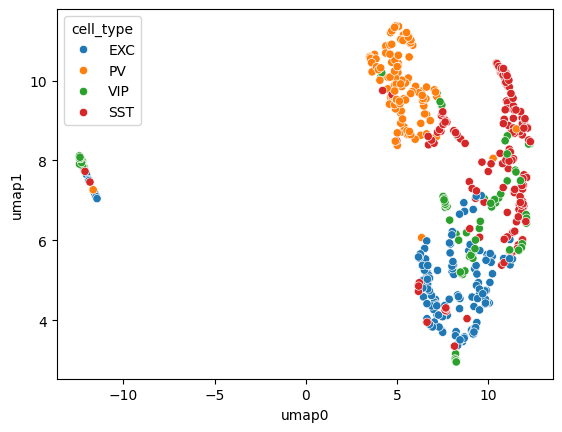

In [30]:
sns.scatterplot(
    data=umap_data2D,
    x='umap0',
    y='umap1',
    hue='cell_type'
)

In [33]:
umap3D = UMAP(n_components=3)
umap_data3D = umap3D.fit_transform(preprocessing_pipe.fit_transform(raw_data.drop('cell_type', axis=1)))
umap_data3D = pd.DataFrame(umap_data3D, columns=['umap0', 'umap1', 'umap2'])
umap_data3D['cell_type'] = raw_data['cell_type']
umap_data3D

,umap0,umap1,umap2,cell_type
0,12.456448,6.940793,4.892116,EXC
1,12.674867,6.436523,4.891471,EXC
2,12.471961,4.078464,4.411397,EXC
3,-3.567272,4.272145,12.008609,EXC
4,12.894658,6.736821,4.670156,EXC
...,...,...,...,...
492,13.056352,7.790486,8.865082,SST
493,12.906425,7.523347,9.261135,SST
494,12.940472,7.791949,8.976675,SST
495,13.268141,7.729290,7.957648,SST


In [35]:
fig = px.scatter_3d(umap_data3D, x='umap0', y='umap1', z='umap2',
              color='cell_type'
              
              )
fig.show()

## KMeans

In [6]:
from sklearn.cluster import KMeans

data = preprocessing_pipe.fit_transform(raw_data.drop('cell_type', axis=1))
np.random.seed(0)
seed = 0


In [7]:
data

,firing_rate,ap_threshold,ap_duration,mean_vm,std_vm,fft_low,fft_high
0,-0.495910,0.945152,-0.334809,2.932638,0.110134,-0.807387,-0.460063
1,-0.673870,0.431527,0.447619,0.925393,-0.401925,-0.415110,-0.600059
2,-0.682623,-0.064111,4.524090,0.569710,0.163293,0.011974,-0.457037
3,-0.685540,3.584400,-1.318126,1.208404,-0.138656,-0.247785,-0.290650
4,-0.676788,0.486469,1.704713,1.406541,-1.267111,-1.271143,-0.953296
...,...,...,...,...,...,...,...
492,-0.300445,-0.872088,-0.334514,-0.500789,-0.749110,0.103783,-0.801514
493,-0.288775,-0.819636,-0.308946,-0.537235,-0.497346,0.317716,-0.475083
494,-0.247932,-0.817149,-0.289779,-0.383761,-0.578599,0.144661,-0.709058
495,-0.364627,-0.898802,-0.305845,-0.554376,-0.883570,-0.366801,-0.835205


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = pd.Series(label_encoder.fit_transform(raw_data["cell_type"]))

In [24]:
scores = []

## PCA

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


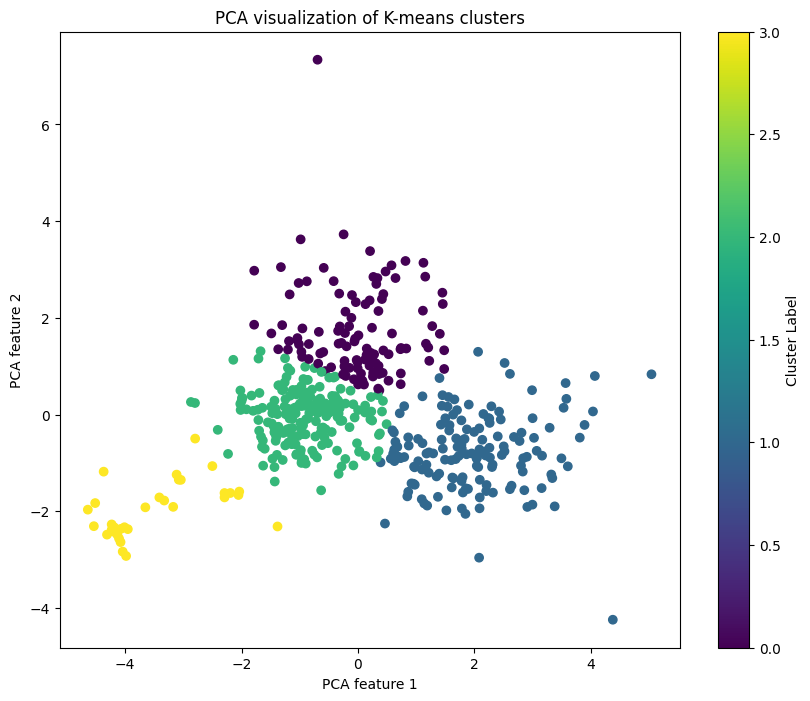

In [9]:
# Step 1: Dimensionality Reduction using PCA
pca = PCA(n_components=2, random_state=seed)  # Retain 95% of the variance
data_pca = pca.fit_transform(data)

# Step 2: Clustering using K-means
kmeans = KMeans(n_clusters=4, random_state=seed)  # Example with 5 clusters
clusters = kmeans.fit_predict(data_pca)

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.title('PCA visualization of K-means clusters')
plt.xlabel('PCA feature 1')
plt.ylabel('PCA feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


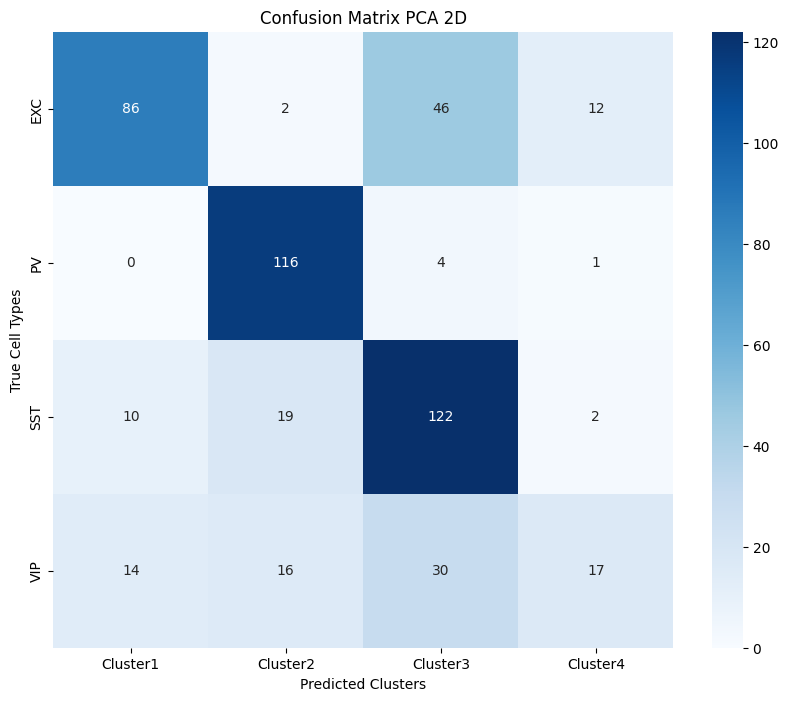

In [11]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(labels, clusters)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], 
            yticklabels=['EXC', 'PV', 'SST', 'VIP'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Cell Types')
plt.title('Confusion Matrix PCA 2D')
plt.show()

In [25]:
cluster_to_label_mapping = {0: 0, 1: 1, 2: 2, 3: 3}
mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Calculating classification metrics
reportPCA2D = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'])

print(reportPCA2D)

reportPCA2D = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'], output_dict=True)

scores.append(reportPCA2D['weighted avg']['f1-score'])

              precision    recall  f1-score   support

         EXC       0.78      0.59      0.67       146
          PV       0.76      0.96      0.85       121
         SST       0.60      0.80      0.69       153
         VIP       0.53      0.22      0.31        77

    accuracy                           0.69       497
   macro avg       0.67      0.64      0.63       497
weighted avg       0.68      0.69      0.66       497



In [26]:
scores

[0.6634310196150109]

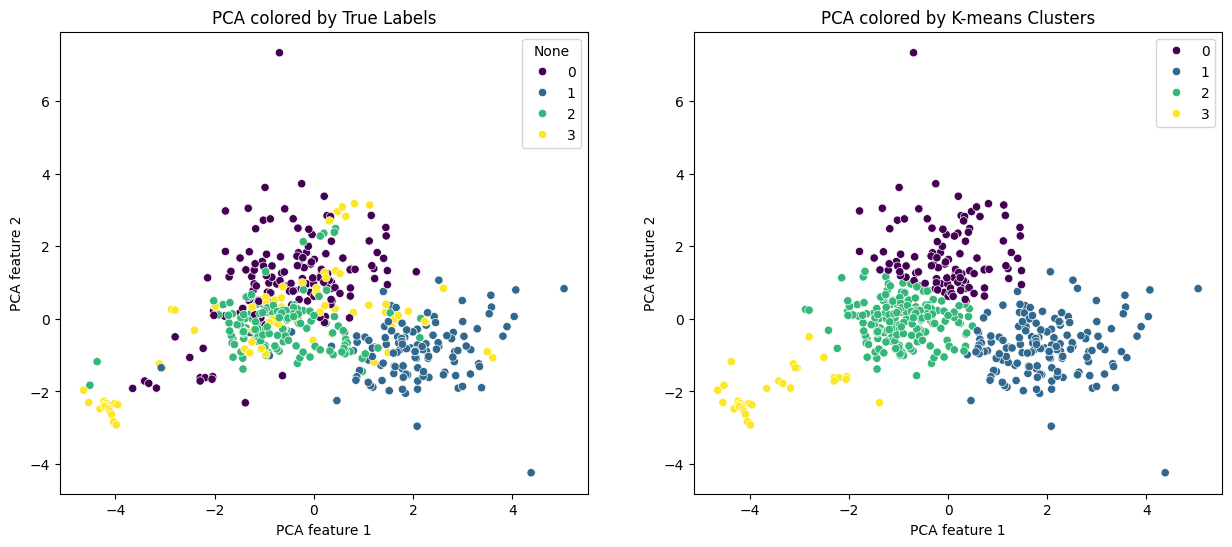

In [27]:
import seaborn as sns

# cluster_to_label_mapping = {0: 'EXC', 1: 'PV', 3: 'SST', 2: 'VIP'}
# mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for true labels
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis', ax=axes[0])
axes[0].set_title('PCA colored by True Labels')
axes[0].set_xlabel('PCA feature 1')
axes[0].set_ylabel('PCA feature 2')

# Plot for k-means clusters
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=mapped_clusters, palette='viridis', ax=axes[1])
axes[1].set_title('PCA colored by K-means Clusters')
axes[1].set_xlabel('PCA feature 1')
axes[1].set_ylabel('PCA feature 2')

plt.show()


/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


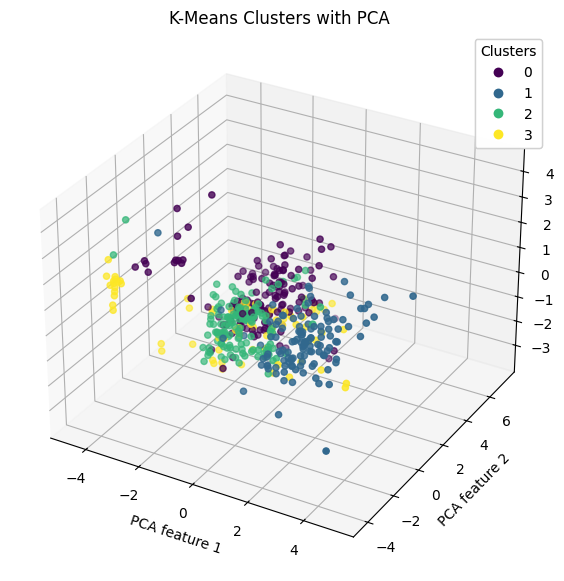

In [29]:
# Step 1: Dimensionality Reduction using PCA
pca3d = PCA(n_components=3, random_state=seed)  # Retain 95% of the variance
data_pca3d = pca3d.fit_transform(data)

# Step 2: Clustering using K-means
kmeans = KMeans(n_clusters=4, random_state=seed)  # Example with 5 clusters
clusters = kmeans.fit_predict(data_pca3d)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

 # Scatter plot
scatter = ax.scatter(data_pca3d[:, 0], data_pca3d[:, 1], data_pca3d[:, 2], 
                    c=labels, cmap='viridis')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Labels
ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')

# Title
ax.set_title('K-Means Clusters with PCA')

plt.show()

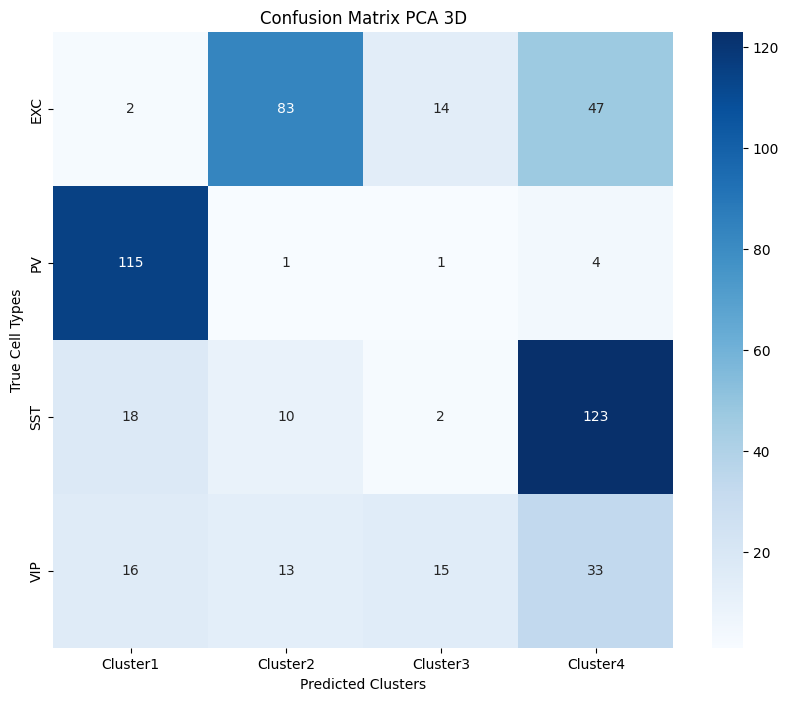

In [30]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(labels, clusters)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], 
            yticklabels=['EXC', 'PV', 'SST', 'VIP'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Cell Types')
plt.title('Confusion Matrix PCA 3D')
plt.show()

In [32]:
cluster_to_label_mapping = {1: 0, 0: 1, 3: 2, 2: 3}
mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Calculating classification metrics
report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'])

print(report)

report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'], output_dict=True)

scores.append(report['weighted avg']['f1-score'])

              precision    recall  f1-score   support

         EXC       0.78      0.57      0.66       146
          PV       0.76      0.95      0.85       121
         SST       0.59      0.80      0.68       153
         VIP       0.47      0.19      0.28        77

    accuracy                           0.68       497
   macro avg       0.65      0.63      0.62       497
weighted avg       0.67      0.68      0.65       497



In [33]:
import plotly.express as px

# Assuming 'data_tsne' is a 3D array (with 3 features after t-SNE)
# and 'labels', 'mapped_clusters' are the cluster labels
# Replace these with your actual variables

# Interactive plot for true labels
fig1 = px.scatter_3d(
    x=data_pca3d[:, 0], y=data_pca3d[:, 1], z=data_pca3d[:, 2],
    color=labels,
    title='pca colored by True Labels',
    labels={'x': 'pca feature 1', 'y': 'pca feature 2', 'z': 'pca feature 3'}
)
fig1.show()

# Interactive plot for K-means clusters
fig2 = px.scatter_3d(
    x=data_pca3d[:, 0], y=data_pca3d[:, 1], z=data_pca3d[:, 2],
    color=mapped_clusters,
    title='pca colored by K-means Clusters',
    labels={'x': 'pca feature 1', 'y': 'pca feature 2', 'z': 'pca feature 3'}
)
fig2.show()

## TSNE

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



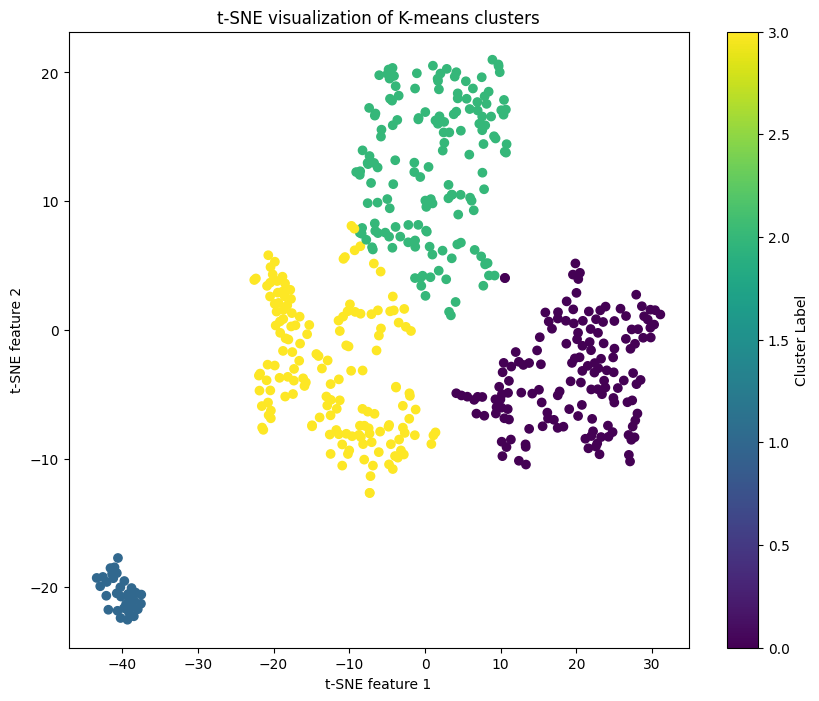

In [34]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Dimensionality Reduction using PCA
tsne = TSNE(n_components=2, random_state=seed)  # Retain 95% of the variance
data_tsne = tsne.fit_transform(data)

# Step 2: Clustering using K-means
kmeans = KMeans(n_clusters=4, random_state=seed)  # Example with 5 clusters
clusters = kmeans.fit_predict(data_tsne)

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('t-SNE visualization of K-means clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

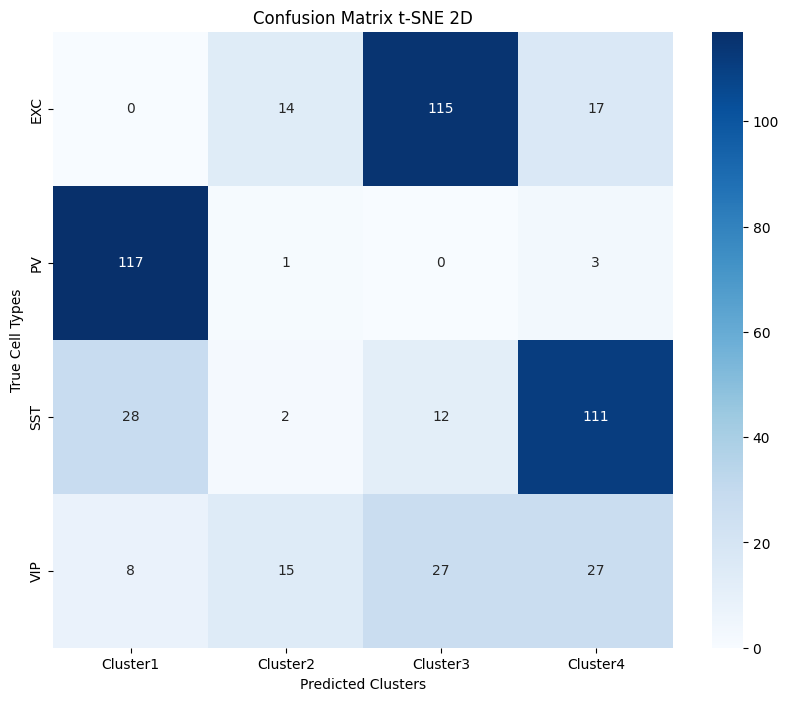

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
labels = pd.Series(label_encoder.fit_transform(raw_data["cell_type"]))
# Creating a confusion matrix
conf_matrix = confusion_matrix(labels, clusters)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], 
            yticklabels=['EXC', 'PV', 'SST', 'VIP'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Cell Types')
plt.title('Confusion Matrix t-SNE 2D')
plt.show()

In [37]:
#cluster_to_label_mapping = {0: 0, 3: 1, 1: 2, 2: 3}
cluster_to_label_mapping = {2: 0, 0: 1, 3: 2, 1: 3}
mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Calculating classification metrics
report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'])

print(report)

report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'], output_dict=True)

scores.append(report['weighted avg']['f1-score'])

              precision    recall  f1-score   support

         EXC       0.75      0.79      0.77       146
          PV       0.76      0.97      0.85       121
         SST       0.70      0.73      0.71       153
         VIP       0.47      0.19      0.28        77

    accuracy                           0.72       497
   macro avg       0.67      0.67      0.65       497
weighted avg       0.69      0.72      0.70       497



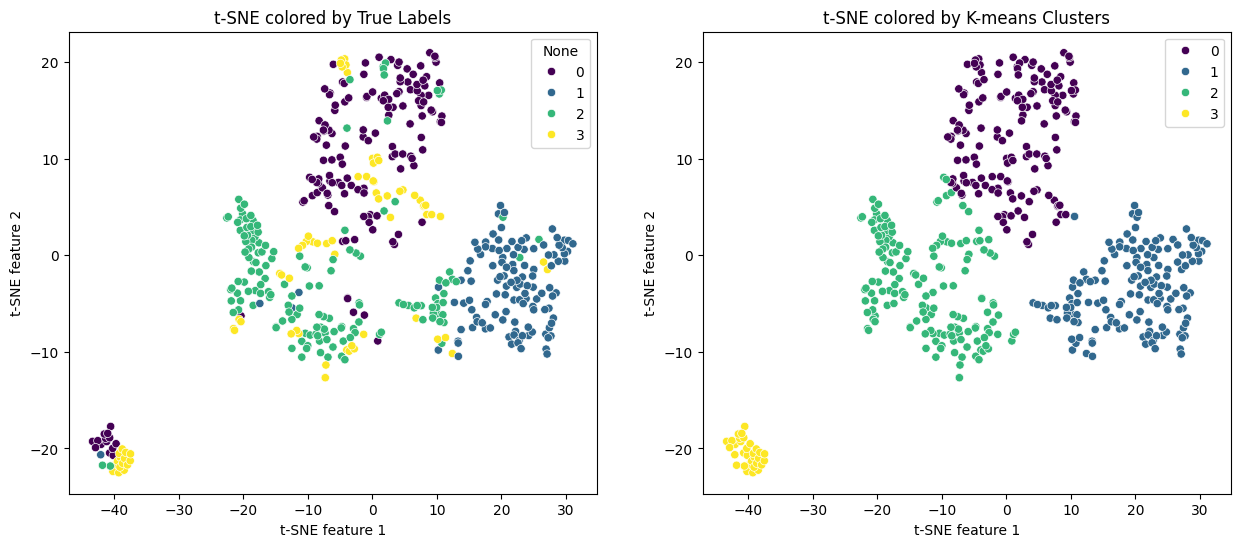

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# cluster_to_label_mapping = {0: 'EXC', 1: 'PV', 3: 'SST', 2: 'VIP'}
# mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for true labels
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=labels, palette='viridis', ax=axes[0])
axes[0].set_title('t-SNE colored by True Labels')
axes[0].set_xlabel('t-SNE feature 1')
axes[0].set_ylabel('t-SNE feature 2')

# Plot for k-means clusters
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=mapped_clusters, palette='viridis', ax=axes[1])
axes[1].set_title('t-SNE colored by K-means Clusters')
axes[1].set_xlabel('t-SNE feature 1')
axes[1].set_ylabel('t-SNE feature 2')

plt.show()

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



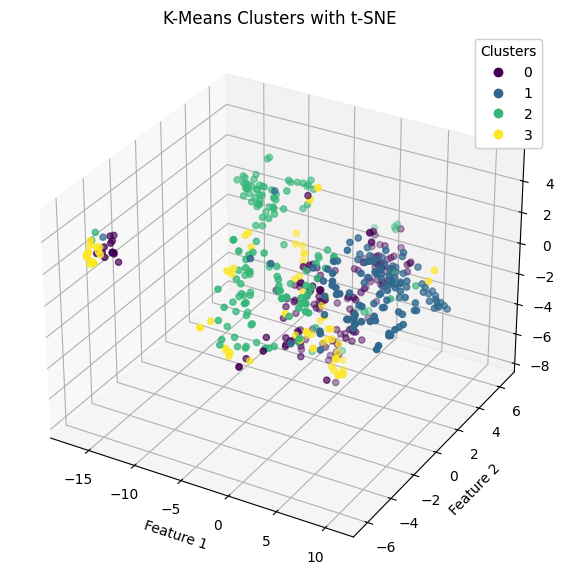

In [39]:
#Visualization using 3D umap

# Step 1: Dimensionality Reduction using PCA
tsne3d = TSNE(n_components=3, random_state=seed)  # Retain 95% of the variance
data_tsne3d = tsne3d.fit_transform(data)

# Step 2: Clustering using K-means
kmeans = KMeans(n_clusters=4, random_state=seed)  # Example with 5 clusters
clusters = kmeans.fit_predict(data_tsne3d)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

 # Scatter plot
scatter = ax.scatter(data_tsne3d[:, 0], data_tsne3d[:, 1], data_tsne3d[:, 2], 
                    c=labels, cmap='viridis')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Title
ax.set_title('K-Means Clusters with t-SNE')

plt.show()

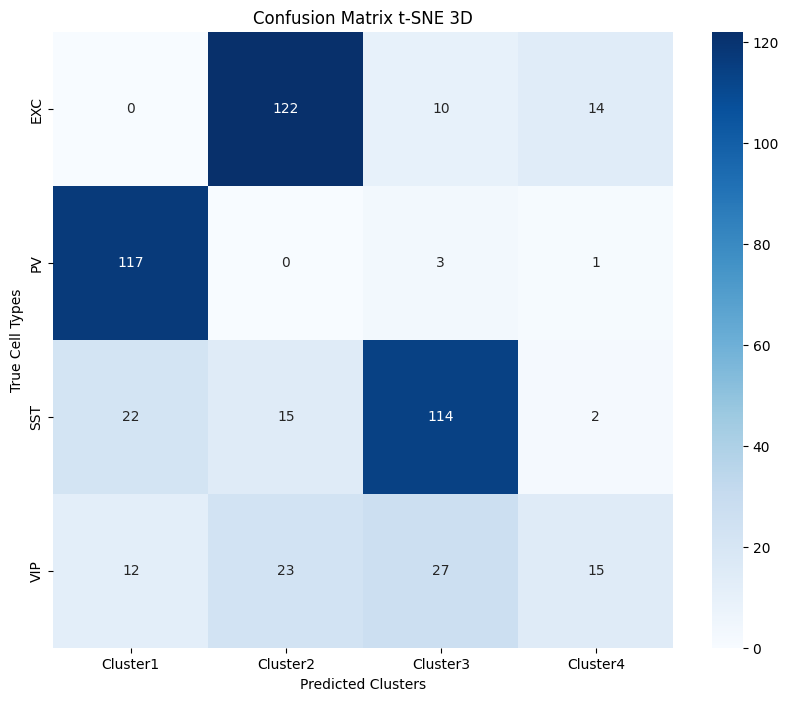

In [40]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(labels, clusters)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], 
            yticklabels=['EXC', 'PV', 'SST', 'VIP'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Cell Types')
plt.title('Confusion Matrix t-SNE 3D')
plt.show()

In [41]:
cluster_to_label_mapping = {1: 0, 0: 1, 2: 2, 3: 3}
mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Calculating classification metrics
report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'])

print(report)

report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'], output_dict=True)

scores.append(report['weighted avg']['f1-score'])

              precision    recall  f1-score   support

         EXC       0.76      0.84      0.80       146
          PV       0.77      0.97      0.86       121
         SST       0.74      0.75      0.74       153
         VIP       0.47      0.19      0.28        77

    accuracy                           0.74       497
   macro avg       0.69      0.69      0.67       497
weighted avg       0.71      0.74      0.71       497



In [42]:
import plotly.express as px

# Assuming 'data_tsne' is a 3D array (with 3 features after t-SNE)
# and 'labels', 'mapped_clusters' are the cluster labels
# Replace these with your actual variables

# Interactive plot for true labels
fig1 = px.scatter_3d(
    x=data_tsne3d[:, 0], y=data_tsne3d[:, 1], z=data_tsne3d[:, 2],
    color=labels,
    title='t-sne colored by True Labels',
    labels={'x': 't-sne feature 1', 'y': 't-sne feature 2', 'z': 't-sne feature 3'}
)
fig1.show()

# Interactive plot for K-means clusters
fig2 = px.scatter_3d(
    x=data_tsne3d[:, 0], y=data_tsne3d[:, 1], z=data_tsne3d[:, 2],
    color=mapped_clusters,
    title='t-sne colored by K-means Clusters',
    labels={'x': 't-sne feature 1', 'y': 't-sne feature 2', 'z': 't-sne feature 3'}
)
fig2.show()

## UMAP

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



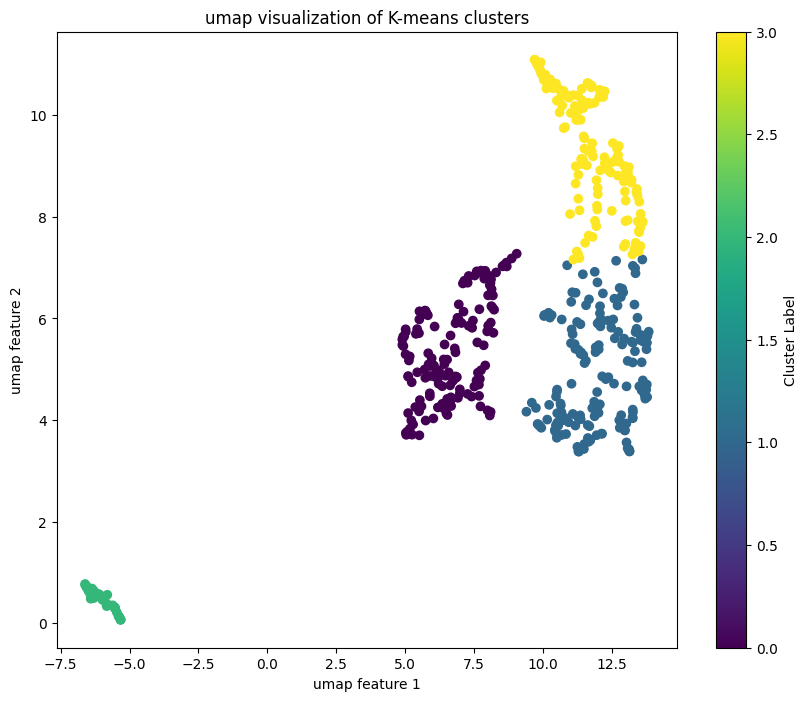

In [43]:
from umap import UMAP

# Step 1: Dimensionality Reduction using PCA
umap = UMAP(n_components=2, random_state=seed)  # Retain 95% of the variance
data_umap = umap.fit_transform(data)

# Step 2: Clustering using K-means
kmeans = KMeans(n_clusters=4, random_state=seed)  # Example with 5 clusters
clusters = kmeans.fit_predict(data_umap)

# Plotting the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(data_umap[:, 0], data_umap[:, 1], c=clusters, cmap='viridis')
plt.title('umap visualization of K-means clusters')
plt.xlabel('umap feature 1')
plt.ylabel('umap feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


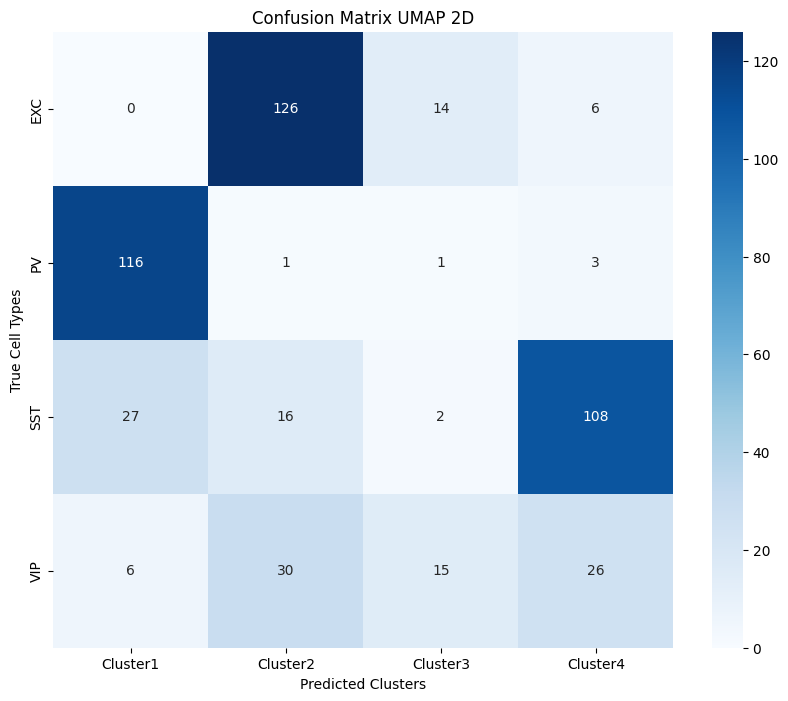

In [44]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(labels, clusters)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], 
            yticklabels=['EXC', 'PV', 'SST', 'VIP'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Cell Types')
plt.title('Confusion Matrix UMAP 2D')
plt.show()

In [45]:
#cluster_to_label_mapping = {0: 0, 3: 1, 1: 2, 2: 3}
cluster_to_label_mapping = {1: 0, 0: 1, 3: 2, 2: 3}
mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Calculating classification metrics
report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'])

print(report)

report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'], output_dict=True)

scores.append(report['weighted avg']['f1-score'])

              precision    recall  f1-score   support

         EXC       0.73      0.86      0.79       146
          PV       0.78      0.96      0.86       121
         SST       0.76      0.71      0.73       153
         VIP       0.47      0.19      0.28        77

    accuracy                           0.73       497
   macro avg       0.68      0.68      0.66       497
weighted avg       0.71      0.73      0.71       497



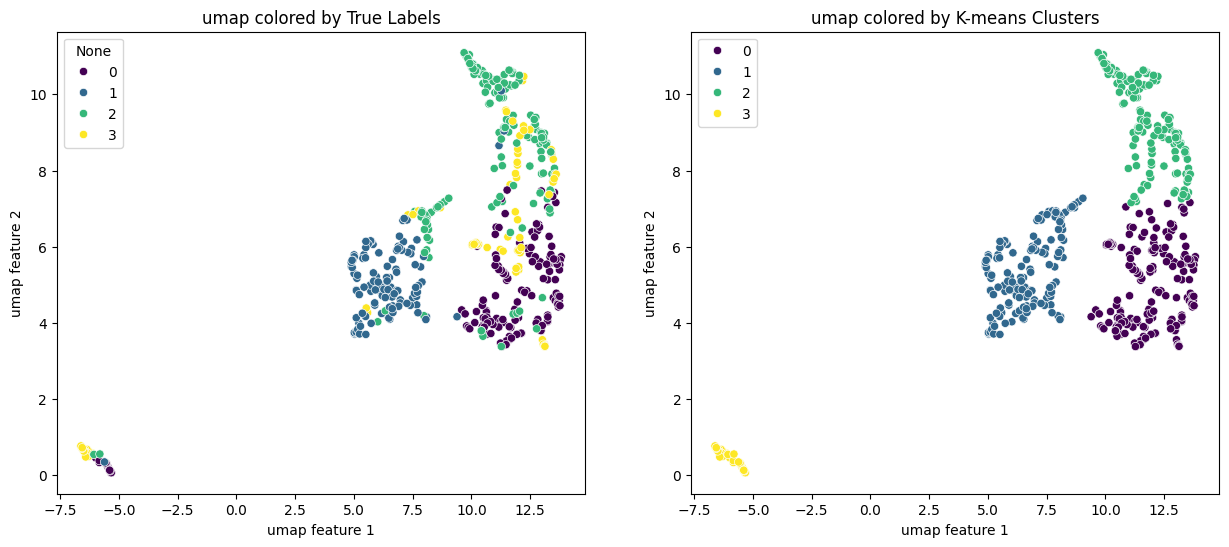

In [46]:
# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot for true labels
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=labels, palette='viridis', ax=axes[0])
axes[0].set_title('umap colored by True Labels')
axes[0].set_xlabel('umap feature 1')
axes[0].set_ylabel('umap feature 2')

# Plot for k-means clusters
sns.scatterplot(x=data_umap[:, 0], y=data_umap[:, 1], hue=mapped_clusters, palette='viridis', ax=axes[1])
axes[1].set_title('umap colored by K-means Clusters')
axes[1].set_xlabel('umap feature 1')
axes[1].set_ylabel('umap feature 2')

plt.show()

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

/Users/mariannescoglio/anaconda3/envs/bio482/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



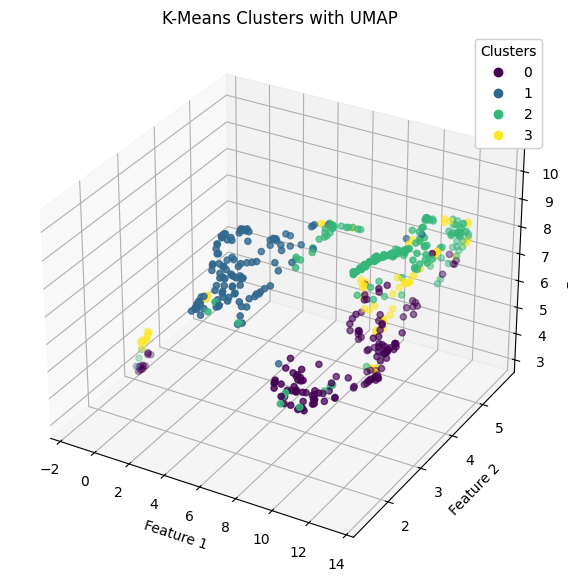

In [48]:
#Visualization using 3D umap

# Step 1: Dimensionality Reduction using PCA
umap3d = UMAP(n_components=3, random_state=seed)  # Retain 95% of the variance
data_umap3d = umap3d.fit_transform(data)

# Step 2: Clustering using K-means
kmeans = KMeans(n_clusters=4, random_state=seed)  # Example with 5 clusters
clusters = kmeans.fit_predict(data_umap3d)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

 # Scatter plot
scatter = ax.scatter(data_umap3d[:, 0], data_umap3d[:, 1], data_umap3d[:, 2], 
                    c=labels, cmap='viridis')

# Legend
legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend1)

# Labels
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Title
ax.set_title('K-Means Clusters with UMAP')

plt.show()

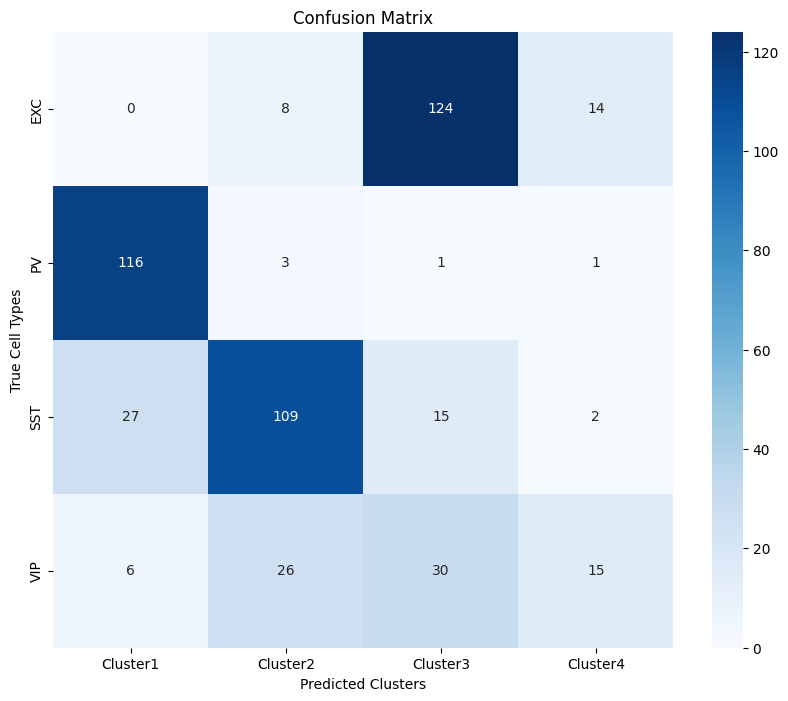

In [49]:
# Creating a confusion matrix
conf_matrix = confusion_matrix(labels, clusters)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'], 
            yticklabels=['EXC', 'PV', 'SST', 'VIP'])
plt.xlabel('Predicted Clusters')
plt.ylabel('True Cell Types')
plt.title('Confusion Matrix')
plt.show()

In [51]:
cluster_to_label_mapping = {2: 0, 0: 1, 1: 2, 3: 3}
mapped_clusters = np.array([cluster_to_label_mapping[cluster] for cluster in clusters])

# Calculating classification metrics
report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'])

print(report)

report = classification_report(labels, mapped_clusters, target_names=['EXC', 'PV', 'SST', 'VIP'], output_dict=True)

scores.append(report['weighted avg']['f1-score'])

              precision    recall  f1-score   support

         EXC       0.73      0.85      0.78       146
          PV       0.78      0.96      0.86       121
         SST       0.75      0.71      0.73       153
         VIP       0.47      0.19      0.28        77

    accuracy                           0.73       497
   macro avg       0.68      0.68      0.66       497
weighted avg       0.71      0.73      0.71       497



In [52]:
import plotly.express as px

# Assuming 'data_tsne' is a 3D array (with 3 features after t-SNE)
# and 'labels', 'mapped_clusters' are the cluster labels
# Replace these with your actual variables

# Interactive plot for true labels
fig1 = px.scatter_3d(
    x=data_umap3d[:, 0], y=data_umap3d[:, 1], z=data_umap3d[:, 2],
    color=labels,
    title='umap colored by True Labels',
    labels={'x': 'umap feature 1', 'y': 'umap feature 2', 'z': 'umap feature 3'}
)
fig1.show()

# Interactive plot for K-means clusters
fig2 = px.scatter_3d(
    x=data_umap3d[:, 0], y=data_umap3d[:, 1], z=data_umap3d[:, 2],
    color=mapped_clusters,
    title='umap colored by K-means Clusters',
    labels={'x': 'umap feature 1', 'y': 'umap feature 2', 'z': 'umap feature 3'}
)
fig2.show()

In [53]:
scores

[0.6634310196150109,
 0.6516163046764769,
 0.6955275541061388,
 0.7149601890029409,
 0.708545478404366,
 0.7068353095909953]